In [ ]:
!pip install librosa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
filename='dataset/drunk/1.wav'

In [ ]:
import IPython.display as ipd
import librosa
import librosa.display


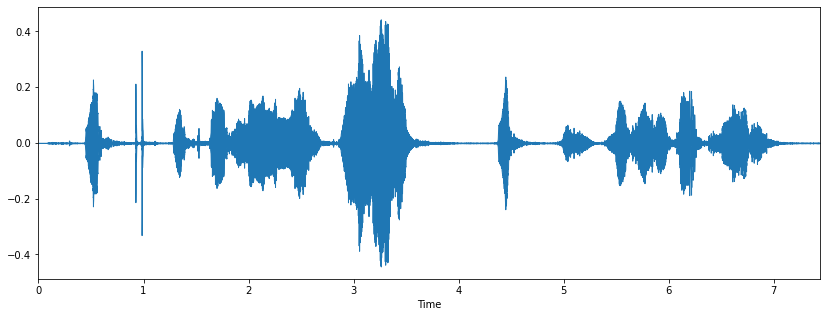

In [ ]:
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

In [ ]:
sample_rate

22050

In [ ]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio=wav.read(filename)

In [ ]:
wave_sample_rate

48000

In [ ]:
wave_audio

array([[  0,   0],
       [  0,   0],
       [  0,   0],
       ...,
       [ -9,  -9],
       [-11, -11],
       [ -8,  -8]], dtype=int16)

In [ ]:
data

array([-4.2772234e-07,  4.7563708e-07, -2.7078013e-05, ...,
        1.7630568e-04, -3.1435842e-04,  0.0000000e+00], dtype=float32)

In [ ]:
import pandas as pd

metadata=pd.read_csv('dataset/metadata.csv')
metadata.head(10)

,filename,class
0,1.wav,drunk
1,2.wav,drunk
2,3.wav,drunk
3,4.wav,drunk
4,5.wav,drunk
5,sober1.wav,sober
6,sober2.wav,sober
7,sober3.wav,sober
8,sober4.wav,sober
9,sober5.wav,sober


In [ ]:
metadata['class'].value_counts()

drunk    5
sober    5
Name: class, dtype: int64

In [ ]:
import librosa
audio_file_path='dataset/sober/sober2.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [ ]:
print(librosa_audio_data)

[0.         0.         0.         ... 0.2160602  0.22326711 0.        ]


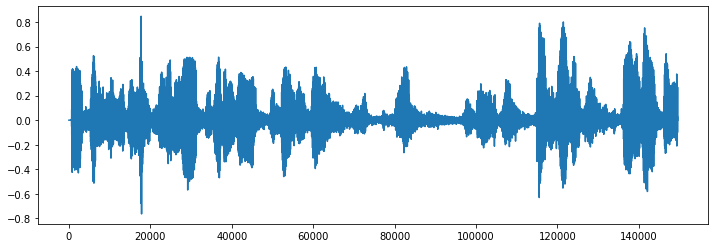

In [ ]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

In [ ]:
### Lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path)

In [ ]:
wave_audio

array([[   0,    0],
       [   0,    0],
       [   0,    0],
       ...,
       [6707, 6912],
       [6478, 6666],
       [6253, 6410]], dtype=int16)

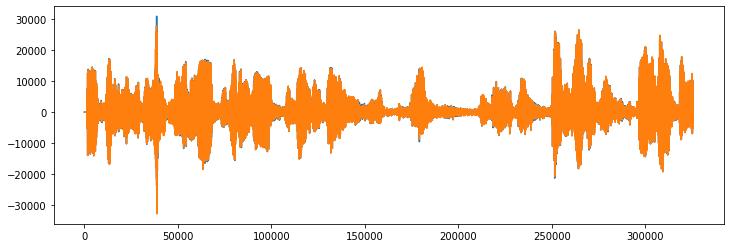

In [ ]:
import matplotlib.pyplot as plt

# Original audio with 2 channels
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

In [ ]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 293)


mfccs

In [ ]:
import pandas as pd
import os
import librosa

audio_dataset_path='dataset/'
metadata=pd.read_csv('dataset/metadata.csv')
metadata.head(10)

,filename,class,fold
0,1.wav,drunk,1
1,2.wav,drunk,1
2,3.wav,drunk,1
3,4.wav,drunk,1
4,5.wav,drunk,1
5,sober1.wav,sober,2
6,sober2.wav,sober,2
7,sober3.wav,sober,2
8,sober4.wav,sober,2
9,sober5.wav,sober,2


In [ ]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

    return mfccs_scaled_features

In [ ]:
import numpy as np
from tqdm import tqdm

In [ ]:

### Now we iterate through every audio file and extract features
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row['fold'])+'/',str(row["filename"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

10it [00:01,  5.17it/s]


In [ ]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head(25)

,feature,class
0,"[-396.11487, 77.80273, 17.475142, 16.91164, -5...",drunk
1,"[-307.03763, 75.936844, 15.462113, 16.492657, ...",drunk
2,"[-307.99606, 75.9657, 15.533483, 16.551294, -6...",drunk
3,"[-308.05353, 76.47755, 15.286895, 16.603714, -...",drunk
4,"[-313.22604, 78.440674, 16.893387, 17.123549, ...",drunk
5,"[-246.26457, 107.347046, -40.861267, 9.694472,...",sober
6,"[-228.83366, 139.86258, -22.336908, 21.704475,...",sober
7,"[-220.77216, 71.895805, -36.065598, 6.1660676,...",sober
8,"[-242.58939, 112.94154, -30.817074, 16.121994,...",sober
9,"[-283.3079, 138.08685, -13.133162, 4.161617, -...",sober


In [ ]:
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [ ]:
X.shape

(10, 40)

In [ ]:
y=np.array(pd.get_dummies(y))

In [ ]:
y.shape

(10, 2)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
X_train

array([[-3.13226044e+02,  7.84406738e+01,  1.68933868e+01,
         1.71235485e+01, -5.60805845e+00, -7.96123409e+00,
        -3.36844826e+01, -6.42894506e-01, -1.41779671e+01,
        -3.38295889e+00, -1.16021147e+01,  6.54580927e+00,
        -9.18929386e+00,  1.56850541e+00, -4.43740177e+00,
        -8.00385284e+00, -3.93320060e+00, -8.32437134e+00,
        -2.86118174e+00, -5.05324364e+00, -8.07412982e-01,
        -1.21057642e+00, -1.61648762e+00, -8.74666572e-01,
         2.71282411e+00,  1.27875006e+00,  3.14192557e+00,
         2.82222342e+00,  3.17902088e+00,  3.80220246e+00,
         3.21808839e+00,  9.20614362e-01,  4.30903959e+00,
         9.85146999e-01,  1.84156334e+00, -1.15055299e+00,
        -1.80411673e+00, -2.65967417e+00, -1.58082426e+00,
        -1.05056584e+00],
       [-2.83307892e+02,  1.38086853e+02, -1.31331615e+01,
         4.16161680e+00, -9.60652351e+00, -1.80868473e+01,
        -1.06430540e+01, -1.09324608e+01, -1.22810955e+01,
        -2.71761799e+00, -7.36

In [ ]:
y

array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1]], dtype=uint8)

In [ ]:
X_train.shape

(8, 40)

In [ ]:
X_test.shape

(2, 40)

In [ ]:
y_train.shape

(8, 2)

In [ ]:
y_test.shape

(2, 2)

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.9.2


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
from keras.layers import Dense, Flatten, MaxPooling2D
from keras.utils import np_utils

In [ ]:
### No of classes
num_labels=y.shape[1]

In [ ]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [ ]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [ ]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5',
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 77.1730 - accuracy: 0.2500
Epoch 1: val_loss improved from inf to 5.29791, saving model to saved_models/audio_classification.hdf5
1/1 [==============================] - 1s 1s/step - loss: 77.1730 - accuracy: 0.2500 - val_loss: 5.2979 - val_accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 20.2656 - accuracy: 0.5000
Epoch 2: val_loss did not improve from 5.29791
1/1 [==============================] - 0s 35ms/step - loss: 20.2656 - accuracy: 0.5000 - val_loss: 8.0294 - val_accuracy: 0.5000
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 16.8348 - accuracy: 0.2500
Epoch 3: val_loss did not improve from 5.29791
1/1 [==============================] - 0s 33ms/step - loss: 16.8348 - accuracy: 0.2500 - val_loss: 8.7987 - val_accuracy: 0.5000
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 12.3809 - accuracy: 0.7500
Epoch 4: val_loss did not improve from 5.2

In [ ]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

1.0
